Nama : Sahrial Ihsani Ishak

Pekerjaan : Mahasiswa di Universitas Bengkulu

Asal : Bengkulu

**This is my submission for course "Belajar Machine Learning Pemula"**

In [1]:
#Import Library yang dibutuhkan
import zipfile,os,shutil #Library untuk ekstraksi
from sklearn.model_selection import train_test_split #Library untuk split data training dan validasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Library untuk augmentasi dan generate gambar
from tensorflow.keras.optimizers import RMSprop #Library untuk optimasi data
#Pastikan Tensorflow versi 2 atau diatasnya
import tensorflow as tf
print(tf.__version__)
#Libary untuk inputan gambar dan plot grafik
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.4.1


In [2]:
#Melakukan import dataset dari server
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-14 07:07:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   732KB/s    in 5m 16s  

2021-05-14 07:13:08 (997 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Ekstraksi pada file zip sebelumnya
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_folder = '/tmp/rockpaperscissors'
train_folder = os.path.join(base_folder, 'train')
validation_folder = os.path.join(base_folder, 'val')

In [4]:
#Membuat Direktori
os.mkdir(train_folder)
os.mkdir(validation_folder)
#Direktori
rock_folder = os.path.join(base_folder,'rock')
paper_folder = os.path.join(base_folder, 'paper')
scissor_folder = os.path.join(base_folder, 'scissors')

In [5]:
#Folder train untuk masing-masing label
train_rock = os.path.join(train_folder, 'rock')
train_paper = os.path.join(train_folder, 'paper')
train_scissor = os.path.join(train_folder, 'scissors')
validation_rock = os.path.join(validation_folder, 'rock')
validation_paper = os.path.join(validation_folder, 'paper')
validation_scissor = os.path.join(validation_folder, 'scissors')
#Buat Direktori/Folder
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissor)
os.mkdir(validation_rock)
os.mkdir(validation_paper)
os.mkdir(validation_scissor)

In [6]:
#Split Dataset, Pisahkan data train dan validation
#validation = 40% dari semua data
train_rock_folder, validation_rock_folder = train_test_split(os.listdir(rock_folder), test_size = 0.40)
train_paper_folder, validation_paper_folder = train_test_split(os.listdir(paper_folder), test_size = 0.40)
train_scissor_folder, validation_scissor_folder = train_test_split(os.listdir(scissor_folder), test_size = 0.40)

In [7]:
for file in train_rock_folder:
  shutil.copy(os.path.join(rock_folder, file), os.path.join(train_rock, file))
for file in train_paper_folder:
  shutil.copy(os.path.join(paper_folder,file), os.path.join(train_paper,file))
for file in train_scissor_folder:
  shutil.copy(os.path.join(scissor_folder,file), os.path.join(train_scissor,file))
for file in validation_rock_folder:
  shutil.copy(os.path.join(rock_folder, file), os.path.join(validation_rock,file))
for file in validation_paper_folder:
  shutil.copy(os.path.join(paper_folder,file), os.path.join(validation_paper,file))
for file in validation_scissor_folder:
  shutil.copy(os.path.join(scissor_folder,file), os.path.join(validation_scissor,file))

In [8]:
#Augmentasi dan generate gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [9]:
#Persiapan Data train dan validasi dari folder yang telah dibuat
train_generator = train_datagen.flow_from_directory(
        train_folder,  # folder data train
        target_size=(150, 150),  # scaling gambar menjadi 150*150 px
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_folder, # folder data validasi
        target_size=(150, 150),  # scaling gambar menjadi 150*150 px
        batch_size=32, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [10]:
#Buat Model CNN, menggunakan 2 layer konvolusi dan max pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
# Optimize the model use adam
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 17, 17, 512)       6

In [12]:
#Callback untuk mencegah overfitting dengan menghentikan training, apabila telah terpenuhi
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nStopped! Akurasi sudah mencapai 95%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [13]:
plot = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[stop]
)

Epoch 1/15
41/41 - 68s - loss: 0.5689 - accuracy: 0.5168 - val_loss: 0.4690 - val_accuracy: 0.6748
Epoch 2/15
41/41 - 65s - loss: 0.3071 - accuracy: 0.8354 - val_loss: 0.2547 - val_accuracy: 0.8646
Epoch 3/15
41/41 - 65s - loss: 0.1798 - accuracy: 0.9177 - val_loss: 0.2060 - val_accuracy: 0.9039
Epoch 4/15
41/41 - 65s - loss: 0.1371 - accuracy: 0.9375 - val_loss: 0.1347 - val_accuracy: 0.9468
Epoch 5/15
41/41 - 65s - loss: 0.0836 - accuracy: 0.9688 - val_loss: 0.1034 - val_accuracy: 0.9537

Stopped! Akurasi sudah mencapai 95%


Saving 2DdERUV7Te8ivywq.png to 2DdERUV7Te8ivywq.png
2DdERUV7Te8ivywq.png
This is Rock


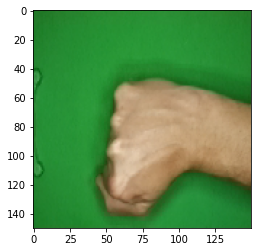

In [20]:
#Input Gambar
%matplotlib inline
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('This is Paper')
  elif classes[0,1]!=0:
    print('This is Rock')
  else:
    print('This is Scissor')

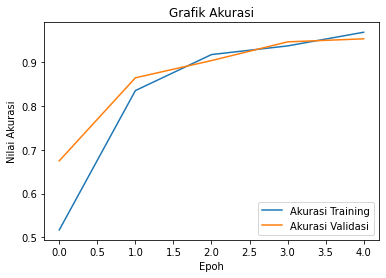

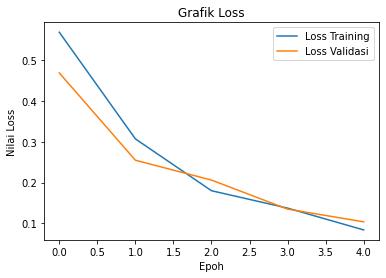

In [17]:
from matplotlib import pyplot as plt
#Accuracy Plot
plt.plot(plot.history['accuracy'], label='Akurasi Training')
plt.plot(plot.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi')
plt.ylabel('Nilai Akurasi')
plt.xlabel('Epoh')
plt.legend(loc="lower right")
plt.show()
#Loss Plot
plt.plot(plot.history['loss'], label='Loss Training')
plt.plot(plot.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss')
plt.ylabel('Nilai Loss')
plt.xlabel('Epoh')
plt.legend(loc="upper right")
plt.show()